In [122]:
import pickle as pkl
from opt.eval_policy import *
from opt.mc_sim import *
import time
from common.variables import *

filename = "output/msource_value_dic_08-05-2022-08-01-23.pkl"

with open(filename, 'rb') as f:
    output_obj = pkl.load(f)

value_dic = output_obj["state_value_dic"]
model_params = output_obj["model_params"]
sourcingEnv = output_obj["mdp_env"]

sourcingEnv2 = SourcingEnv(
    lambda_arrival = model_params['mdp_env_params']['lambda'], # or 10
    procurement_cost_vec = np.array(model_params['mdp_env_params']['procurement_cost_vec']),
    supplier_lead_times_vec = np.array(model_params['mdp_env_params']['supplier_lead_times_vec']),
    on_times = np.array([1, 1]), 
    off_times = np.array([np.Inf, np.Inf]))

s_custom = MState(stock_level = 0, 
    n_suppliers = N_SUPPLIERS, 
    n_backorders = np.array([0, 0]), 
    flag_on_off = np.array([1, 1]))

In [123]:
mc_avg_costs_di = mc_with_policy(sourcingEnv2, start_state = s_custom, 
    periods = 20,
    nested_mc_iters = 20,
    big_s = model_params['policy_params']['big_s'],
    small_s = model_params['policy_params']['small_s'],
    h_cost = model_params['policy_params']['h_cost'],
    b_penalty = model_params['policy_params']['b_penalty'],
    policy_callback=dual_index_policy,
    use_tqdm = True)

print(np.mean(np.array(mc_avg_costs_di)))
print(np.median(np.array(mc_avg_costs_di)))
print(np.std(np.array(mc_avg_costs_di)))

100%|██████████| 20/20 [00:22<00:00,  1.12s/it]

62.86428571428572
37.23809523809524
38.919034145529125


In [124]:
from sim.dual_index_v1 import *
mc_avg_costs_di = mc_with_policy(sourcingEnv2, start_state = s_custom, 
    periods = 20,
    nested_mc_iters = 20,
    big_s = model_params['policy_params']['big_s'],
    small_s = model_params['policy_params']['small_s'],
    h_cost = model_params['policy_params']['h_cost'],
    b_penalty = model_params['policy_params']['b_penalty'],
    policy_callback=dual_index_policy_v1,
    use_tqdm = True)

print(np.mean(np.array(mc_avg_costs_di)))
print(np.median(np.array(mc_avg_costs_di)))
print(np.std(np.array(mc_avg_costs_di)))

100%|██████████| 20/20 [00:44<00:00,  2.25s/it]

64.02619047619046
37.095238095238095
38.73638880252414


In [125]:
mc_avg_costs_ss = mc_with_policy(sourcingEnv2, start_state = s_custom, 
    periods = 30,
    nested_mc_iters = 100,
    big_s = model_params['policy_params']['big_s'],
    small_s = model_params['policy_params']['small_s'],
    h_cost = model_params['policy_params']['h_cost'],
    b_penalty = model_params['policy_params']['b_penalty'],
    use_tqdm = True)

print(np.mean(np.array(mc_avg_costs_ss)))
print(np.median(np.array(mc_avg_costs_ss)))
print(np.std(np.array(mc_avg_costs_ss)))

100%|██████████| 100/100 [00:00<00:00, 109.91it/s]

91.30064516129032
65.61290322580645
58.6813024092459


In [126]:
model_params

{'algo_params': {'prob_epsilon': 1e-08,
  'periods': 31,
  'nested_mc_iters': 29,
  'mc_episodes': 33,
  'max_steps': 40,
  'explore_eps': 0.05,
  'debug_bool': 0,
  'fixed_learn_rate': 0.1},
 'policy_params': {'h_cost': 2,
  'b_penalty': 10,
  'small_s': 1,
  'big_s': 6,
  'n_suppliers': 2,
  'backorder_max': -10,
  'inven_limit': 30},
 'mdp_env_params': {'lambda': 10,
  'max_inven': 30,
  'action_size': 4,
  'discount_fac': 1.0,
  'procurement_cost_vec': [45, 5],
  'supplier_lead_times_vec': [0.019, 0.4],
  'on_times': [5, 1],
  'off_times': [0.5, 1]},
 'eval_params': {'safe_factor': 1.1,
  'n_visit_limit': 2,
  'sub_eval_periods': 30,
  'sub_nested_mc_iter': 30},
 'dual_index': {'di_safety_factor': 5, 'delta_cand_range': 20}}

In [127]:
model_params

{'algo_params': {'prob_epsilon': 1e-08,
  'periods': 31,
  'nested_mc_iters': 29,
  'mc_episodes': 33,
  'max_steps': 40,
  'explore_eps': 0.05,
  'debug_bool': 0,
  'fixed_learn_rate': 0.1},
 'policy_params': {'h_cost': 2,
  'b_penalty': 10,
  'small_s': 1,
  'big_s': 6,
  'n_suppliers': 2,
  'backorder_max': -10,
  'inven_limit': 30},
 'mdp_env_params': {'lambda': 10,
  'max_inven': 30,
  'action_size': 4,
  'discount_fac': 1.0,
  'procurement_cost_vec': [45, 5],
  'supplier_lead_times_vec': [0.019, 0.4],
  'on_times': [5, 1],
  'off_times': [0.5, 1]},
 'eval_params': {'safe_factor': 1.1,
  'n_visit_limit': 2,
  'sub_eval_periods': 30,
  'sub_nested_mc_iter': 30},
 'dual_index': {'di_safety_factor': 5, 'delta_cand_range': 20}}

In [128]:
output_obj

{'state_value_dic': {'[-1, 0, 0, 1, 1]': (-55.22826287687602, 841),
  '[0, 0, 0, 0, 1]': (-26.023342765620153, 1030),
  '[0, 0, 0, 1, 0]': (-216.52023323008964, 1869),
  '[-1, 0, 1, 1, 1]': (-2475.211157446195, 153),
  '[0, 0, 1, 1, 1]': (-2618.5023938895574, 152),
  '[0, 0, 1, 0, 1]': (-24.78671066931035, 171),
  '[0, 0, 1, 1, 0]': (-24.964562969366764, 55),
  '[-1, 0, 2, 1, 1]': (-33.81218100433329, 177),
  '[0, 0, 2, 1, 1]': (-26.105381334375, 140),
  '[0, 0, 2, 0, 1]': (-24.156339439655177, 200),
  '[0, 0, 2, 1, 0]': (-25.420264256016353, 55),
  '[-1, 0, 3, 1, 1]': (-25.460184576426723, 140),
  '[0, 0, 3, 1, 1]': (-25.399528415948282, 110),
  '[0, 0, 3, 0, 1]': (-25.67327318576509, 200),
  '[0, 0, 3, 1, 0]': (-25.8053125, 54),
  '[-1, 0, 4, 1, 1]': (-26.448037082004316, 140),
  '[0, 0, 4, 1, 1]': (-25.473429094827594, 110),
  '[0, 0, 4, 0, 1]': (-25.401400730032332, 200),
  '[0, 0, 4, 1, 0]': (-24.98168103448276, 54),
  '[-1, 0, 5, 1, 1]': (-24.373421430107765, 140),
  '[0, 0, 5, 1

In [129]:
# best_small_s, best_big_s, best_val = find_opt_ss_policy_via_mc(sourcingEnv, periods = 20, nested_mc_iters = 50)
# best (s, S) policy found by MC:: (2, 5)

In [130]:
# model_params['branch_name'], model_params['git_commit']

In [131]:
# sourcingEnv = SourcingEnv(
#         lambda_arrival = 8, # or 10
#         procurement_cost_vec = np.array([3, 1, 2]),
#         supplier_lead_times_vec = np.array([0.8, 0.5, 1.0]),
#         on_times = np.array([1, 1, 2]), 
#         off_times = np.array([0.3, 1, 0.2]))

# Dual Sourcing
# sourcingEnv = SourcingEnv(
#         lambda_arrival = LAMBDA, # or 10
#         procurement_cost_vec = np.array([3, 1]),
#         supplier_lead_times_vec = np.array([0.8, 0.5]),
#         on_times = np.array([1, 1]), 
#         off_times = np.array([0.3, 1]))



# mc_avg_costs_ss = mc_with_policy(sourcingEnv2, start_state = s_custom, 
#     periods = 30,
#     nested_mc_iters = 100,
#     big_s = model_params['policy_params']['big_s'],
#     small_s = model_params['policy_params']['small_s'],
#     h_cost = model_params['policy_params']['h_cost'],
#     b_penalty = model_params['policy_params']['b_penalty'],
#     use_tqdm = True)

# print(np.mean(np.array(mc_avg_costs_ss)))

In [132]:
# mc_avg_costs = mc_with_ss_policy(sourcingEnv, 
#     periods = 100,
#     nested_mc_iters = 50,
#     big_s = 5,
#     small_s = 2,
#     h_cost = model_params['policy_params']['h_cost'],
#     b_penalty = model_params['policy_params']['b_penalty'])

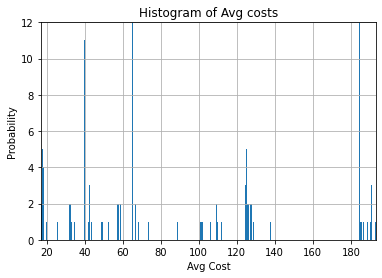

In [133]:
import matplotlib.pyplot as plt
import numpy as np

binwidth = 0.6
n, bins, patches = plt.hist(mc_avg_costs_ss, bins=np.arange( np.min(mc_avg_costs_ss), np.max(mc_avg_costs_ss) + binwidth, binwidth))
# n, bins, patches = plt.hist(mc_avg_costs, density = True)


plt.xlabel('Avg Cost')
plt.ylabel('Probability')
plt.title('Histogram of Avg costs')
plt.xlim(np.min(mc_avg_costs_ss), np.max(mc_avg_costs_ss))
plt.ylim(0, np.max(n))
plt.grid(True)
plt.show()

In [134]:
print(np.mean(np.array(mc_avg_costs_ss)))

91.30064516129032


In [135]:
print(np.median(np.array(mc_avg_costs_ss)))

65.61290322580645


In [136]:
np.std(np.array(mc_avg_costs_ss))

58.6813024092459

In [137]:
myopic_cost = mc_with_policy(sourcingEnv2, start_state = s_custom, 
    periods = 20,
    nested_mc_iters = 20,
    big_s = model_params['policy_params']['big_s'],
    small_s = model_params['policy_params']['small_s'],
    h_cost = model_params['policy_params']['h_cost'],
    b_penalty = model_params['policy_params']['b_penalty'],
    policy_callback=myopic2_policy,
    use_tqdm = True)

100%|██████████| 20/20 [01:24<00:00,  4.24s/it]


In [138]:
np.mean(myopic_cost)

54.445238095238096

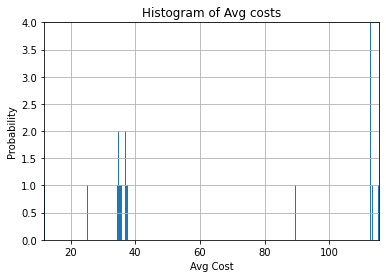

In [139]:
import matplotlib.pyplot as plt
import numpy as np

binwidth = 0.3
n, bins, patches = plt.hist(mc_avg_costs_di, bins=np.arange( np.min(mc_avg_costs_di), np.max(mc_avg_costs_di) + binwidth, binwidth))
# n, bins, patches = plt.hist(mc_avg_costs, density = True)


plt.xlabel('Avg Cost')
plt.ylabel('Probability')
plt.title('Histogram of Avg costs')
plt.xlim(np.min(mc_avg_costs_di), np.max(mc_avg_costs_di))
plt.ylim(0, np.max(n))
plt.grid(True)
plt.show()

In [140]:
single_supplier_mean_costs = []
for s in range(sourcingEnv2.n_suppliers):

    kwargs = {"periods" : 30,
        "nested_mc_iters" : 30,
        "h_cost": model_params['policy_params']['h_cost'],
        "b_penalty" : model_params['policy_params']['b_penalty'],
        "supplier_index": s
    }

    single_supplier_costs = mc_with_policy(sourcingEnv2, start_state = s_custom, 
        use_tqdm = True,
        policy_callback = single_source_orderupto_policy,
        **kwargs)
    
    single_supplier_mean_costs.append(np.mean(single_supplier_costs))


100%|██████████| 30/30 [00:05<00:00,  5.31it/s]


In [141]:
single_supplier_mean_costs

[51.95376344086023, 32.31935483870968]

In [142]:
np.min(single_supplier_mean_costs)

32.31935483870968

In [143]:
kwargs = {
    "value_dic": value_dic, 
    "periods": 10, 
    "periods_val_it": 1,
    "nested_mc_iters": 30,
    "max_stock": BIG_S,
    "discount_fac": DISCOUNT_FAC,
    "h_cost": model_params['policy_params']['h_cost'],
    "b_penalty": model_params['policy_params']['b_penalty'],
    "n_visit_lim": N_VISIT_LIM,
    "default_ss_policy": ss_policy_fastest_supp_backlog,
    "safe_factor": SAFE_FACTOR,
    "sub_eval_periods": SUB_EVAL_PERIODS,
    "sub_nested_mc_iter": SUB_NESTED_MC_ITER,
    "max_stock": 2,
    "approx_eval": True
}

mc_avg_costs = mc_with_policy(sourcingEnv2, 
    start_state = s_custom, 
    use_tqdm = True,
    policy_callback = eval_policy_from_value_dic,
    **kwargs)

100%|██████████| 30/30 [00:03<00:00,  8.60it/s]


In [144]:
np.mean(mc_avg_costs)

42.54242424242424

In [145]:
mc_avg_costs

[32.90909090909091,
 54.0,
 53.81818181818182,
 54.0,
 32.18181818181818,
 54.0,
 54.0,
 31.636363636363637,
 54.0,
 55.63636363636363,
 29.272727272727273,
 54.0,
 29.636363636363637,
 31.636363636363637,
 28.727272727272727,
 33.09090909090909,
 30.545454545454547,
 32.36363636363637,
 53.45454545454545,
 54.0,
 31.454545454545453,
 53.63636363636363,
 53.81818181818182,
 29.272727272727273,
 54.0,
 31.727272727272727,
 31.454545454545453,
 29.636363636363637,
 54.0,
 54.36363636363637]